## Notes
- This model is based off the preivous lab assignment model (Q1).
- Get data changed to get Fashion MNIST.

In [2]:
import tensorflow as tf
import torch

# check if GPU is being used
print("GPU Status: ", end = '')
if len(tf.config.list_physical_devices('GPU')) != 0: print("Active")
else: print("Inactive")

GPU Status: Active


In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
from tensorflow import keras

#tf version should be 2.5 or higher
tf.__version__

'2.10.0'

In [4]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.fashion_mnist.load_data()

In [5]:
#scale model
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
#reshape inputs for CNN layers
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [7]:
# CNN MODEL
#  - Notes - 
# Total Filters (Features) = 108
# Increased stride resolution
# Added an additional conv2d layer
# Regularization Techniques Used:
#   1) Batch Normalization (scale = False due to relu)
#   2) Dropout (decreased to 20% due to batch normalization)

model = keras.Sequential([
    keras.layers.Conv2D(kernel_size = 3, filters = 12, use_bias = False, padding = 'same', input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 24, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Flatten(),

    keras.layers.Dense(200, use_bias = False),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
])

In [8]:
# NEW MODEL COMPILE
#  - Notes - 
# Changed optimizer to adam to maintain momentum
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.3480 - accuracy: 0.8757 - val_loss: 0.2751 - val_accuracy: 0.8992
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2319 - accuracy: 0.9138 - val_loss: 0.2308 - val_accuracy: 0.9130
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1901 - accuracy: 0.9309 - val_loss: 0.2172 - val_accuracy: 0.9163
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1552 - accuracy: 0.9427 - val_loss: 0.2129 - val_accuracy: 0.9231
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1237 - accuracy: 0.9543 - val_loss: 0.2224 - val_accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0943 - accuracy: 0.9670 - val_loss: 0.2187 - val_accuracy: 0.9299
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0709 - accuracy: 0.9743 - val_loss: 0.2288 - val_ac

In [10]:
#evaluate
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2790 - accuracy: 0.9317

Test accuracy: 0.9316999912261963


In [11]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 92ms/step


In [12]:
#Raw predictions
predictions

array([[1.27102426e-10, 1.90310636e-12, 1.27295785e-10, 7.99997330e-13,
        1.12469975e-14, 4.53554512e-12, 1.14894719e-10, 1.68828666e-11,
        9.51410717e-14, 1.00000000e+00],
       [1.23189645e-08, 1.29110611e-10, 9.99999762e-01, 8.76865136e-10,
        2.10938623e-07, 4.18460058e-12, 1.27859696e-08, 7.75789589e-12,
        7.15354387e-10, 2.28687236e-10],
       [8.54166293e-13, 1.00000000e+00, 1.60619651e-12, 1.39620178e-15,
        7.79580773e-13, 6.65865540e-12, 3.23959718e-12, 5.83292702e-12,
        6.30041765e-12, 1.94327909e-12],
       [1.15641358e-10, 1.00000000e+00, 1.86498918e-14, 2.73789791e-08,
        1.34230708e-11, 1.47695550e-10, 3.92766486e-09, 2.83329860e-10,
        1.15400192e-12, 4.08483768e-11],
       [6.03852444e-04, 3.98438742e-13, 3.00887518e-06, 8.87579219e-08,
        2.86807463e-05, 9.61162816e-10, 9.99364316e-01, 1.26923884e-12,
        1.51963384e-08, 6.17054097e-09]], dtype=float32)

In [13]:
# Print our model's predictions
print(np.argmax(predictions, axis=1))

[9 2 1 1 6]


In [14]:
# Check our predictions against the ground truths
print(test_labels[:5]) # [Ankle Boot, Pullover, Trouser, Trouser, Shirt]

[9 2 1 1 6]


### Evaluate the model

313/313 - 1s - loss: 0.2790 - accuracy: 0.9317 - 895ms/epoch - 3ms/step


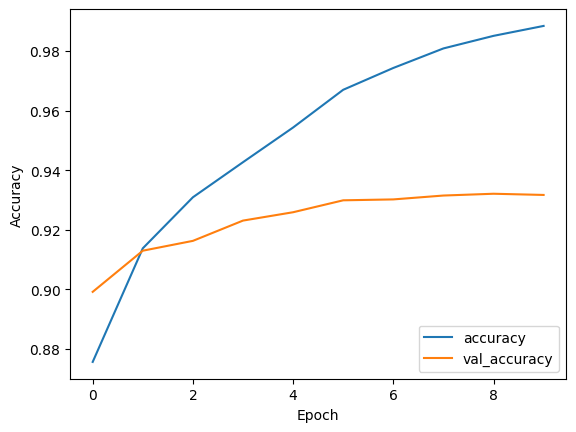

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.95, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

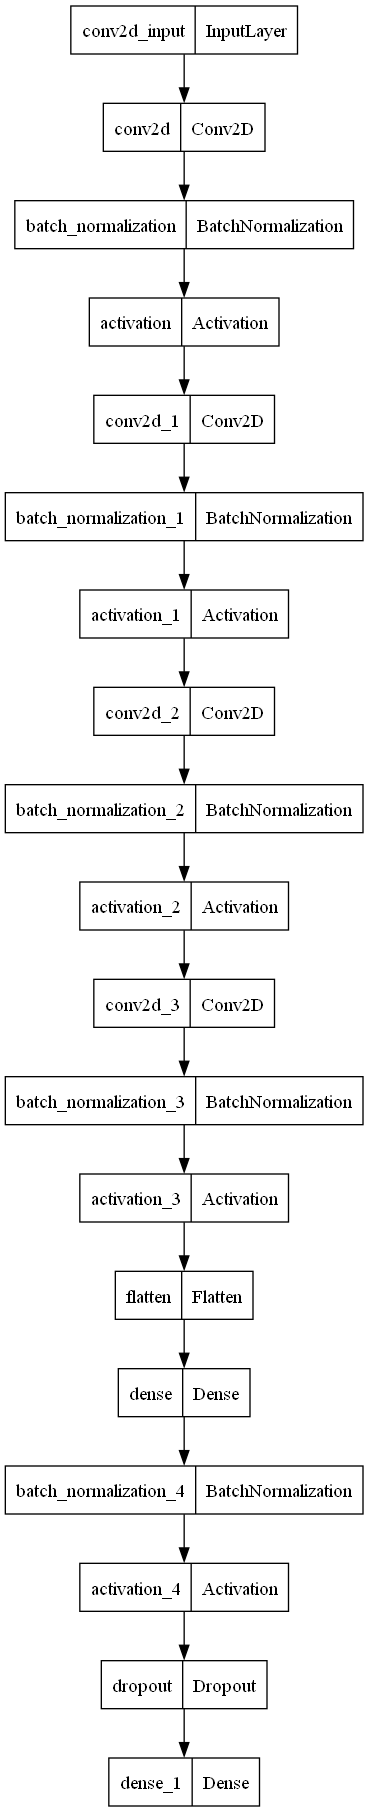

In [17]:
input = model.input
output = [layer.output for layer in model.layers]

model = tf.keras.Model(inputs = [input], outputs = [output])

tf.keras.utils.plot_model(
    model,
    to_file='homemade_model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)